# California Housing Price

[Sumber data California House](https://drive.google.com/file/d/1NJ7DsgZ3zIdZWTz17RQWgbtDBuk1JVg3/view)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Dataset ini diambil dari data sensus yang dilakukan di California pada tahun 1990. Dataset ini menggambarkan informasi mengenai harga perumahan per blok di negara bagian California. Data ini memiliki variabel seperti populasi, median pendapatan, median nilai perumahan, dan lain-lain untuk setiap blok di California. Blok adalah unit geografis paling kecil yang dikeluarkan oleh US Census Bureau. Sebuah blok biasanya memiliki populasi 600 hingga 3000 orang. Maka dari itu, setiap barisnya tidak menggambarkan harga 1 rumah, melainkan nilai tengan harga rumah dalam suatu blok. 


**Problem**

Hasil dari model ini akan digunakan untuk sistem Machine Learning yang lain. Sistem tersebut yang akan menentukan apakah keputusan yang tepat untuk berinvestasi di blok perumahan tersebut atau tidak. Benar atau salahnya keputusan ini akan mempengaruhi keuntungan investor secara langsung.

**Goals**

Membuat model yang dapat memprediksi harga perumahan di California

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu blok dengan blok yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga tengah dari suatu perumahan

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

- Dataset merupakan data sensus di California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait suatu blok hingga harganya

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Pengukuran seberapa baratnya sebuah blok, semakin ke barat maka semakin mahal |
| latitude | Float | Pengukuan seberapa utaranya sebuah blok, semakin ke utara maka semakin mahal |
| housingMedianAge | Float | Angka semakin kecil maka bloknya semakin baru |
| total_rooms | Float | Jumlah ruangan di sebuah blok |
| total_bedrooms | Float | Jumlah kamar tidur di sebuah blok |
| population | Float | Jumlah orang yang menetap di sebuah blok |
| households | Float | Jumlah keluarga yang menetap di sebuah blok |
| median_income | Float | Nilai tengah pendapatan sebuah blok ($10.000) |
| ocean_proximity | Object | Lokasi blok dengan mengacu ke laut |
| median_house_value | Float | Nilai tengah harga rumah sebuah blok |

<br>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# load data set
df = pd.read_csv(r'C:\Users\cyber\OneDrive\Desktop\Purwadhika Data Science\Modul 3 Machine Learning\Final Project\Capstone Modul 3\Datasets for Students\Regression\data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [3]:
# lihat tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


# Exploratory Data Analysis

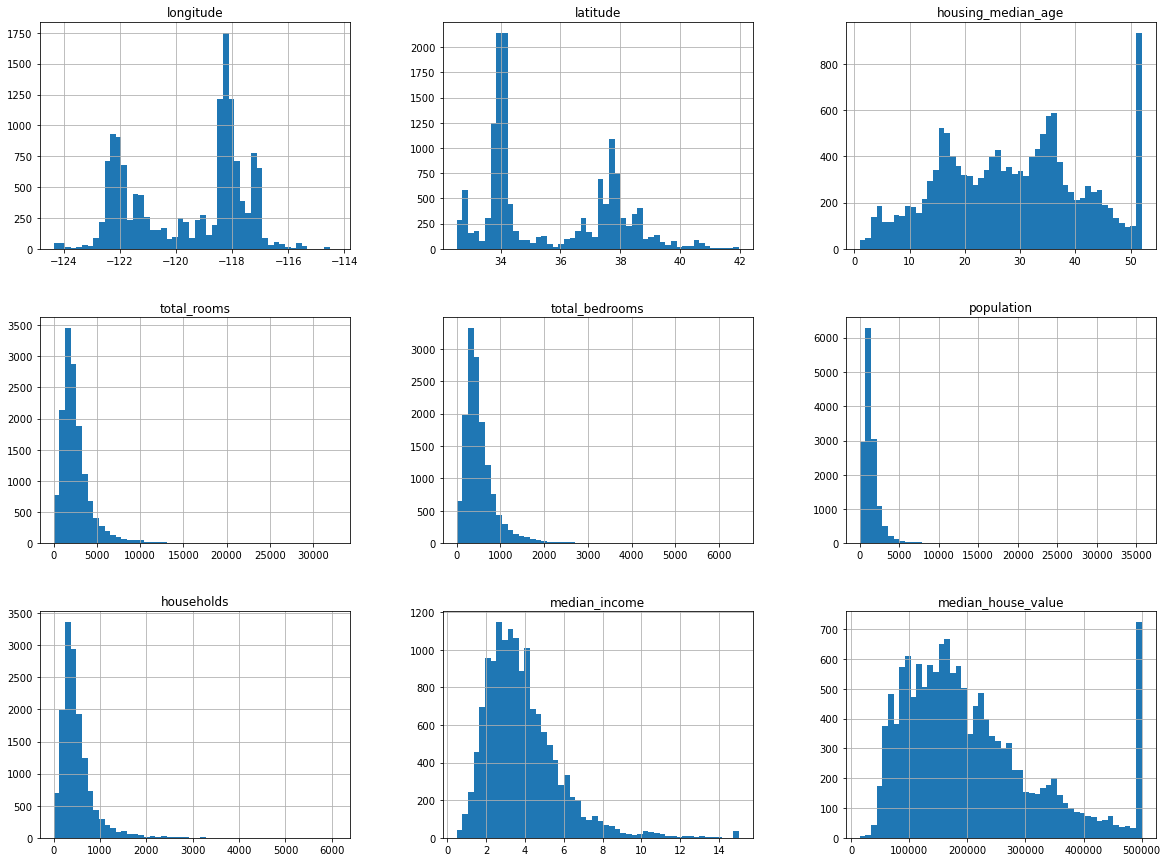

In [4]:
# melihat persebaran datanya seperti apa
df.hist(bins = 50, figsize = (20,15))
plt.show()

**Location**

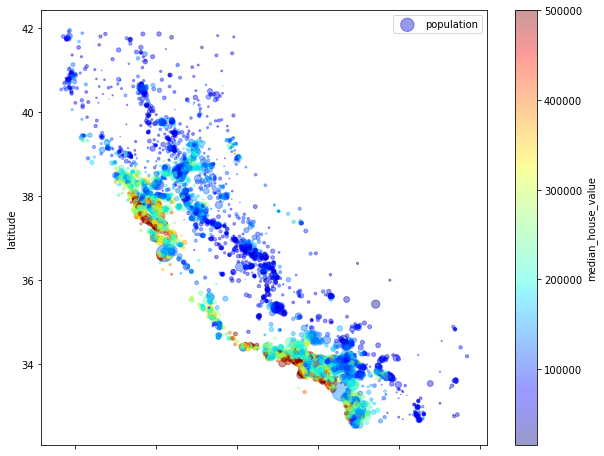

In [5]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
s=df['population']/100, label='population',
c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.gcf().set_size_inches(10, 8)
plt.legend();

Scatterplot diatas menjelaskan bahwa tidak hanya median income yang menyebabkan median house value yang mahal. Namun ketika suatu daerah lokasinya makin mendekati pantai maka median house value juga akan semakin mahal. Populasi juga akan makin ramai di daerah yang mendekati pantai dan akan mengakibatkan peningkatan pada median house value juga.

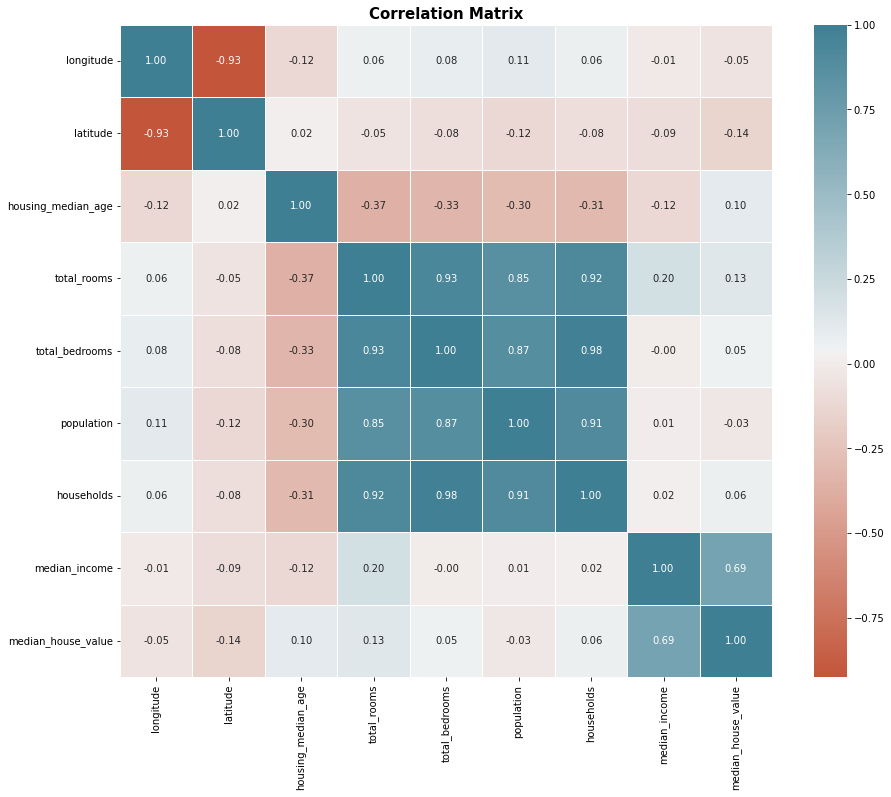

In [6]:
# Correlation matrix agar mampu melihat korelasi lebih mudah daripada df.corr() biasa
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa ada fitur yang memiliki korelasi yang kuat terhadap fitur median_house_value. Korelasi paling tinggi terhadap median house value dimiliki oleh fitur median_income, di mana korelasinya adalah korelasi positif. Ini berarti semakin tinggi median_income suatu daerah, maka semakin mahal juga median_house_value daerah tersebut.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [7]:
# Melihat data yang kosong
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# Total Bedrooms terdistribusi secara skewed positif, jadi akan saya isi dengan median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
# Untuk melihat berapa banyak data yang unik di tiap kolom

pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, 435.0, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 78

Karena median_house_value dan housing_median_age datanya di capped. Maka kita buat dataset baru untuk menghapus data yang capped tersebut. Namun hanya capped data di variabel median_house_value saja yang dihapus karena variabel ini merupakan variabel target dari model machine learning kita. Harus dihapus agar model tidak mengira bahwa harga median_house tidak akan melebihi 500.000. Kita dapat membiarkan capped data yang ada di kolom housing_median_age.

In [10]:
dfBaru = df[df['median_house_value']< 500001]
dfBaru.reset_index(drop = True, inplace = True)
dfBaru

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
13765,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
13766,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
13767,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
13768,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [11]:
# Cek data duplikat
dfBaru.duplicated().sum()

0

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, tidak ada fitur yang tidak relevan. Maka dari itu, tidak ada fitur yang dihapus

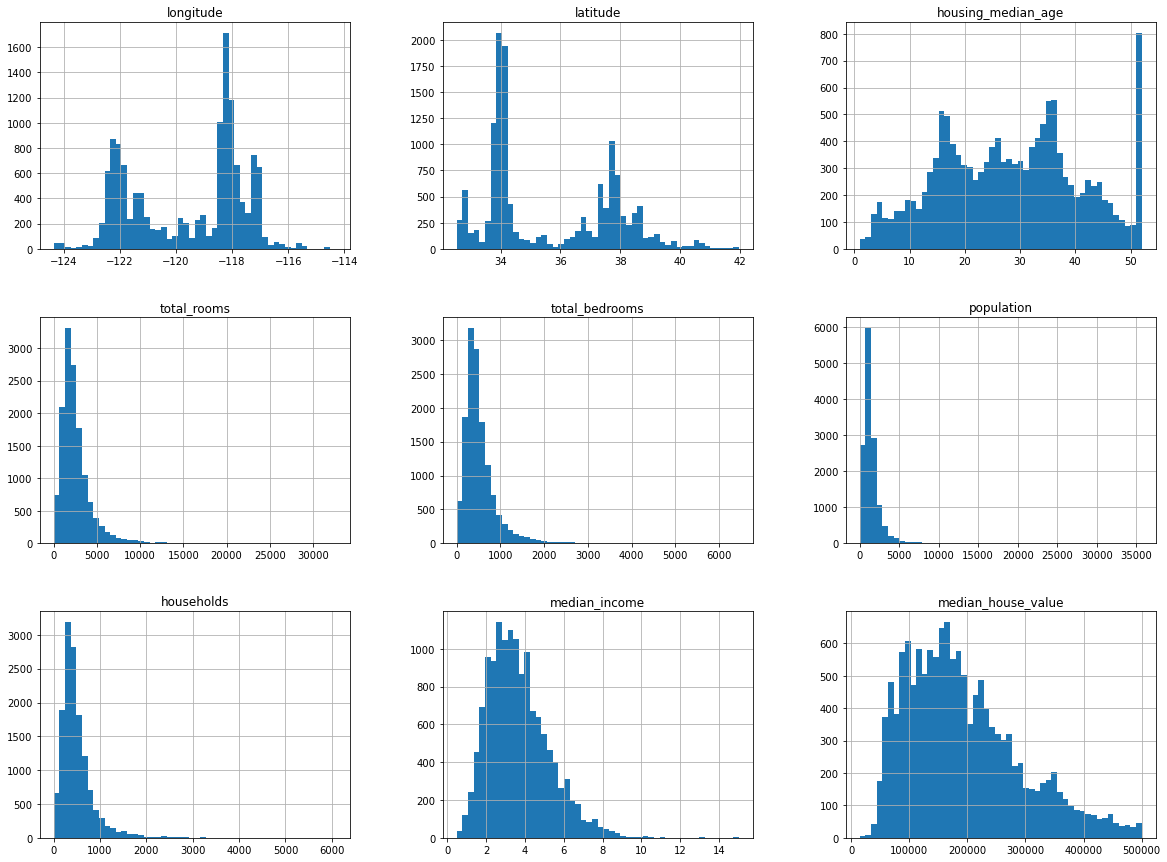

In [12]:
# Melihaat persebaran data setelah dihapus
dfBaru.hist(bins = 50, figsize=(20,15))
plt.show()

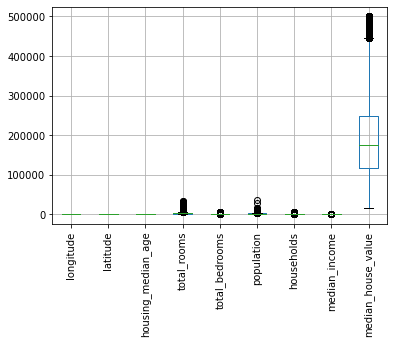

In [13]:
# Boxplot untuk mengecek outliers
dfBaru.boxplot(rot=90);

In [14]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [15]:
# Outliers pada fitur median_house_value
find_anomalies(dfBaru['median_house_value'])

IQR: 131300.0
limit_bawah: -80250.0
limit_atas: 444950.0


In [16]:
# Outliers pada fitur median_income
find_anomalies(dfBaru['median_income'])

IQR: 2.0437000000000003
limit_bawah: -0.5342500000000006
limit_atas: 7.640550000000001


In [17]:
# Outliers pada fitur households
find_anomalies(dfBaru['households'])

IQR: 326.0
limit_bawah: -209.0
limit_atas: 1095.0


In [18]:
# Outliers pada fitur population
find_anomalies(dfBaru['population'])

IQR: 949.75
limit_bawah: -631.625
limit_atas: 3167.375


In [19]:
# Outliers pada fitur total_bedrooms
find_anomalies(dfBaru['total_bedrooms'])

IQR: 349.0
limit_bawah: -226.5
limit_atas: 1169.5


In [20]:
# Outliers pada fitur total_rooms
find_anomalies(dfBaru['total_rooms'])

IQR: 1679.75
limit_bawah: -1079.375
limit_atas: 5639.625


In [21]:
# Outliers pada fitur housing_median_age
find_anomalies(dfBaru['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**median_house_value**

In [22]:
# Cek deskriptif statistik kolom median_house_value
dfBaru['median_house_value'].describe()

count    13770.000000 
mean     192389.360712
std      97589.825606 
min      14999.000000 
25%      116700.000000
50%      174000.000000
75%      248000.000000
max      500000.000000
Name: median_house_value, dtype: float64

In [23]:
# Cek median_house_value > $444950.0
dfBaru[dfBaru['median_house_value'] > 444950.0].count()['median_house_value']

254

Terlihat bahwa 75% data pada kolom price bernilai kurang dari $248000, sedangkan nilai maksimalnya adalah $500000. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 254 data yang nilai price-nya lebih besar dari $444950 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari $444950 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

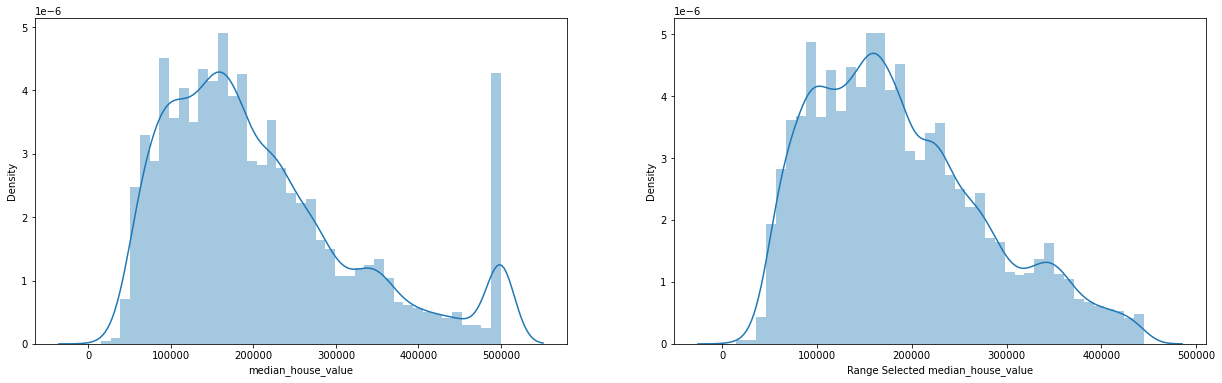

In [24]:
# Melakukan filtering pada data
dfBaru = dfBaru[(dfBaru['median_house_value'] <= 444950.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(dfBaru['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value');

In [25]:
# Cek deskriptif statistik kolom median_house_value setelah filtering
dfBaru['median_house_value'].describe()

count    13516.000000 
mean     187170.286845
std      90665.874542 
min      14999.000000 
25%      115600.000000
50%      171600.000000
75%      242200.000000
max      444500.000000
Name: median_house_value, dtype: float64

**median_income**

In [26]:
dfBaru['median_income'].describe()

count    13516.000000
mean     3.628904    
std      1.512044    
min      0.499900    
25%      2.517900    
50%      3.421600    
75%      4.527800    
max      15.000100   
Name: median_income, dtype: float64

In [27]:
# Cek jumlah nilai median_income > 7.6405
dfBaru[dfBaru['median_income'] > 7.6405].count()['median_income']

182

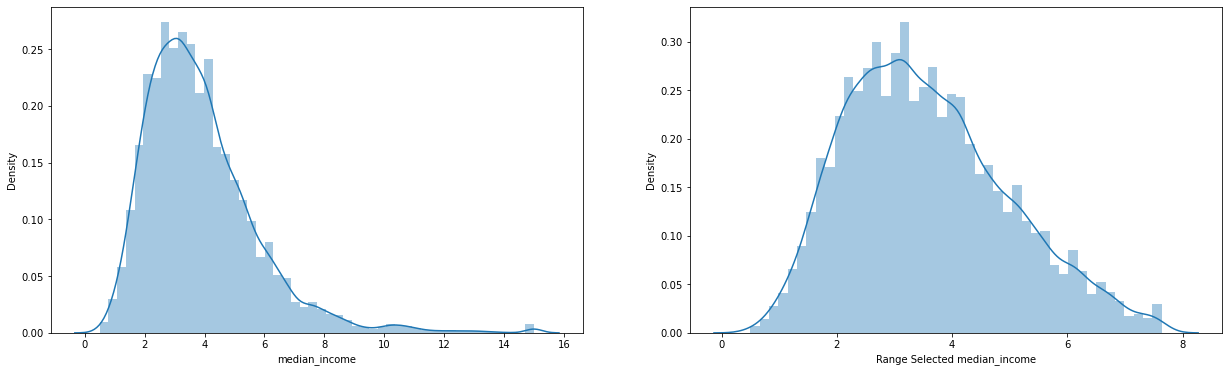

In [28]:
# Melakukan filtering pada data
dfBaru = dfBaru[(dfBaru['median_income'] <= 7.6405)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(dfBaru['median_income'], ax=axes[1])
axes[0].set_xlabel('median_income')
axes[1].set_xlabel('Range Selected median_income');

**households**

In [29]:
dfBaru['households'].describe()

count    13334.000000
mean     501.970076  
std      384.538600  
min      2.000000    
25%      281.000000  
50%      412.000000  
75%      607.000000  
max      6082.000000 
Name: households, dtype: float64

In [30]:
# Cek jumlah nilai households > 1095
dfBaru[dfBaru['households'] > 1095].count()['households']

774

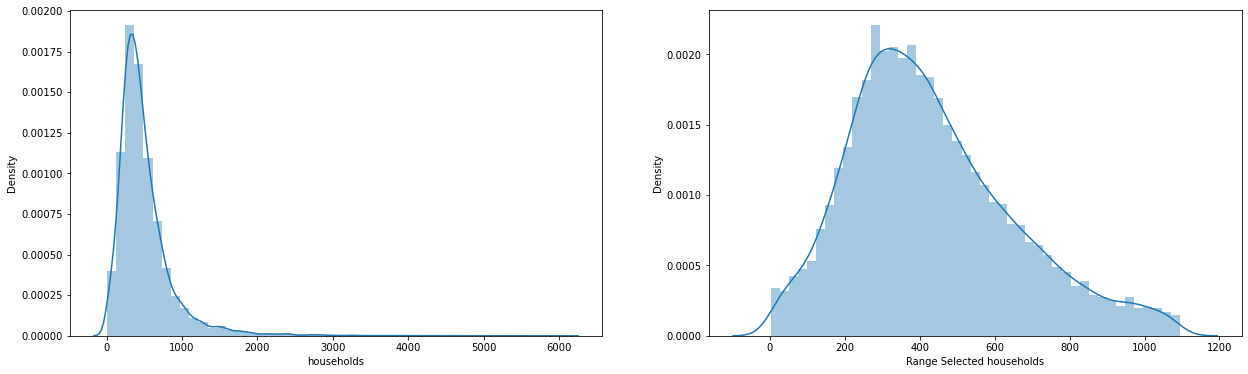

In [31]:
# Melakukan filtering pada data
dfBaru = dfBaru[(dfBaru['households'] <= 1095)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(dfBaru['households'], ax=axes[1])
axes[0].set_xlabel('households')
axes[1].set_xlabel('Range Selected households');

**population**

In [32]:
dfBaru['population'].describe()

count    12560.000000
mean     1259.863933 
std      700.669835  
min      3.000000    
25%      779.000000  
50%      1139.000000 
75%      1619.000000 
max      8733.000000 
Name: population, dtype: float64

In [33]:
# Cek jumlah nilai population > 3167.375
dfBaru[dfBaru['population'] > 3167.375].count()['population']

201

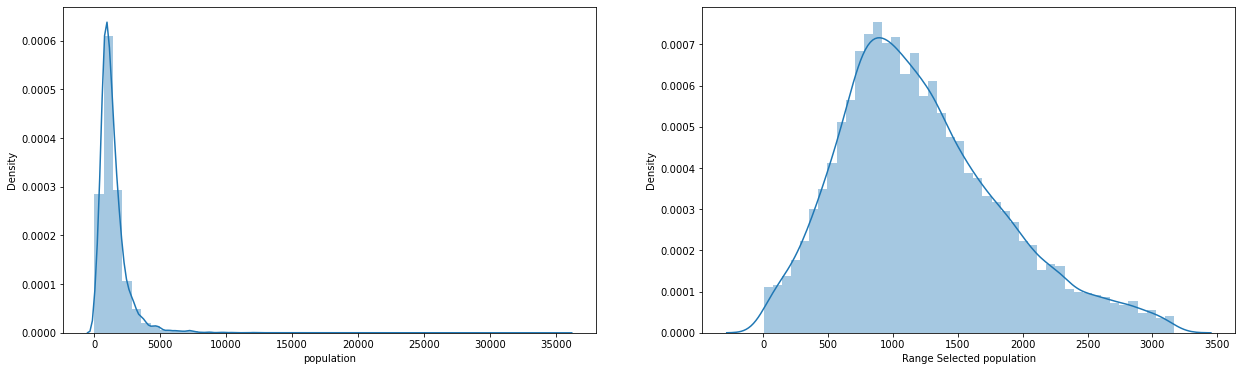

In [34]:
# Melakukan filtering pada data
dfBaru = dfBaru[(dfBaru['population'] <= 3167.375)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(dfBaru['population'], ax=axes[1])
axes[0].set_xlabel('population')
axes[1].set_xlabel('Range Selected population');

**total_rooms**

In [35]:
dfBaru['total_rooms'].describe()

count    12359.000000
mean     2208.049680 
std      1207.680873 
min      2.000000    
25%      1384.000000 
50%      1997.000000 
75%      2829.500000 
max      12342.000000
Name: total_rooms, dtype: float64

In [36]:
# Cek jumlah nilai total_rooms > 5639.625
dfBaru[dfBaru['total_rooms'] > 5639.625].count()['total_rooms']

167

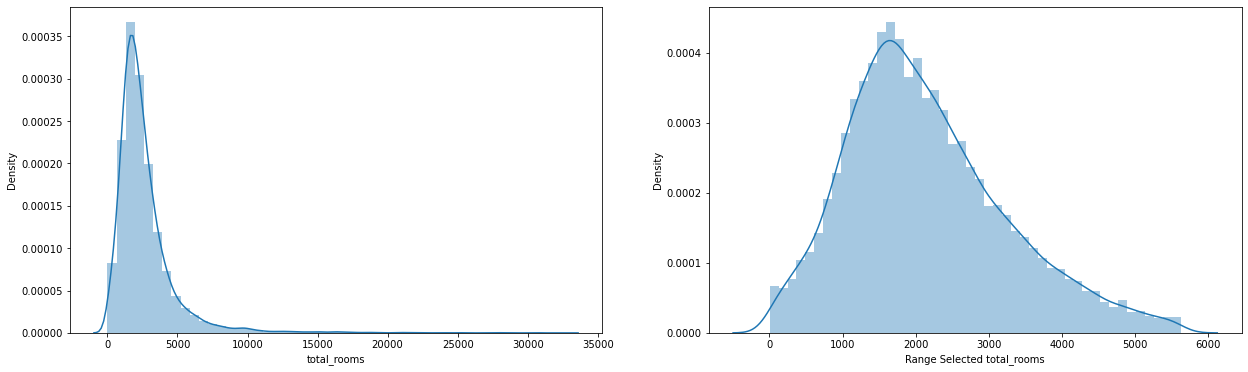

In [37]:
# Melakukan filtering pada data
dfBaru = dfBaru[(dfBaru['total_rooms'] <= 5639.625)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(dfBaru['total_rooms'], ax=axes[1])
axes[0].set_xlabel('total_rooms')
axes[1].set_xlabel('Range Selected total_rooms');

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [39]:
dfBaru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12192 entries, 0 to 13769
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12192 non-null  float64
 1   latitude            12192 non-null  float64
 2   housing_median_age  12192 non-null  float64
 3   total_rooms         12192 non-null  float64
 4   total_bedrooms      12192 non-null  float64
 5   population          12192 non-null  float64
 6   households          12192 non-null  float64
 7   median_income       12192 non-null  float64
 8   ocean_proximity     12192 non-null  object 
 9   median_house_value  12192 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


Pada akhirnya, tersisa 12192 baris data yang akan digunakan untuk pemodelan. Ini berarti ada 15,6% data yang sudah dihapus

In [40]:
# Melihat korelasi antar kolom
dfBaru.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923472,-0.092475,0.007284,0.046391,0.126374,0.040405,-0.001368,-0.038337
latitude,-0.923472,1.000000,-0.007816,-0.005658,-0.058796,-0.157762,-0.078379,-0.091253,-0.164157
housing_median_age,-0.092475,-0.007816,1.000000,-0.308731,-0.242962,-0.195409,-0.214178,-0.169906,0.092017
total_rooms,0.007284,-0.005658,-0.308731,1.000000,0.885224,0.764515,0.880972,0.273549,0.180313
total_bedrooms,0.046391,-0.058796,-0.242962,0.885224,1.000000,0.812530,0.962546,-0.026104,0.083773
population,0.126374,-0.157762,-0.195409,0.764515,0.812530,1.000000,0.861729,0.000684,-0.009116
households,0.040405,-0.078379,-0.214178,0.880972,0.962546,0.861729,1.000000,0.018103,0.116332
median_income,-0.001368,-0.091253,-0.169906,0.273549,-0.026104,0.000684,0.018103,1.000000,0.626262
median_house_value,-0.038337,-0.164157,0.092017,0.180313,0.083773,-0.009116,0.116332,0.626262,1.000000


**Variabel yang paling menonjol untuk memprediksi median house value adalah median income. Maka dari itu, mari kita lihat scatterplot antara median income dengan median house value** 

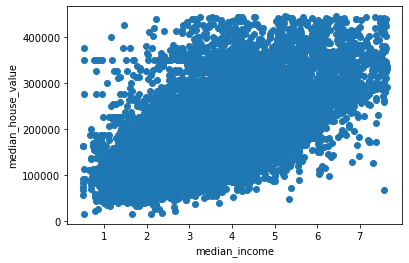

In [41]:
plt.scatter(data = dfBaru, x='median_income', y='median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value');

Median income 

## Modelling

**Encoding**

In [42]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['ocean_proximity']),
], remainder='passthrough')

In [43]:
dfBaru

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
13764,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
13765,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
13766,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
13767,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0


Kolom total_rooms, total_bedrooms, dan population kurang informatif karena masih mengacu kepada blok. Mari kita buat kolom baru agar semakin spesifik. Siapa tau model akan melihat bahwa kolom baru ini dapat memprediksi harga lebih baik daripada median_income

In [44]:
dfBaru['rooms_per_household'] = dfBaru['total_rooms']/dfBaru['households']
dfBaru['bedrooms_per_room'] = dfBaru['total_bedrooms']/dfBaru['total_rooms']
dfBaru['population_per_household'] = dfBaru['population']/dfBaru['households']

In [45]:
corr_matrix = dfBaru.corr()

In [46]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.626262
total_rooms                 0.180313
households                  0.116332
housing_median_age          0.092017
total_bedrooms              0.083773
rooms_per_household         0.083265
population                 -0.009116
longitude                  -0.038337
latitude                   -0.164157
population_per_household   -0.181830
bedrooms_per_room          -0.186794
Name: median_house_value, dtype: float64

**Data Splitting**

In [47]:
# Memisahkan data independen variabel dengan target
X = dfBaru.drop(['median_house_value'], axis=1)
y = dfBaru['median_house_value']

**Data Training**

In [48]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=10)

**Memilih Benchmark Model**

In [49]:
# Define algoritma yang digunakan menurut contoh capstone
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
linear = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
randomForest = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [linear, knn, dt, randomForest, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=10)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-56206.14935581 -54023.68181202 -53989.62208793 -60970.63473009
 -54090.14323618] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-39755.23296449 -39673.99446014 -39318.53697664 -40581.34198809
 -38225.97853799] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.23783618 -0.25081204 -0.2393011  -0.24636194 -0.22039392] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-51593.11064626 -50906.35265095 -50802.73195169 -51677.49336999
 -51549.64431582] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-36347.52178269 -35389.7467298  -35242.99951274 -35885.41495609
 -35628.25956115] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [50]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-55856.046244,2692.251829,-39511.016985,764.221313,-0.238941,0.010405
1,KNN Regressor,-51305.866587,372.236227,-35698.788508,390.873139,-0.211532,0.006505
2,DecisionTree Regressor,-60495.492050,1745.036655,-41160.669680,1354.907141,-0.248724,0.011142
3,RandomForest Regressor,-43891.797594,798.533461,-29414.448904,525.369458,-0.172997,0.008318
4,XGBoost Regressor,-41432.842651,941.368481,-28024.845024,514.857240,-0.166176,0.008908


- Berdasarkan nilai kelima model yang diukur menggunakan 3 metrik regresi, XGBoost adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [51]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=10),
    'RandomForest': RandomForestRegressor(random_state=10)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,40641.360686,28247.867038,0.168222
RandomForest,43536.072090,30279.480487,0.182601


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [52]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [53]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=10, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=10)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 10  
)

In [54]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                  

In [55]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
29,4.375833,0.188704,0.031041,0.003112,0.6,0.021544,122,9,0.05,6,...,360.622767,1,-0.175054,-0.192388,-0.172598,-0.178925,-0.165185,-0.176830,0.008979,1
43,2.312406,0.127627,0.021618,0.001489,0.5,0.002783,108,5,0.11,1,...,648.016292,3,-0.187884,-0.199094,-0.182202,-0.184115,-0.168385,-0.184336,0.009894,2
32,9.211367,0.298619,0.039643,0.003205,0.9,1.29155,167,10,0.23,4,...,573.426946,2,-0.187917,-0.198665,-0.181967,-0.181928,-0.171288,-0.184353,0.008942,3
38,6.246587,0.309022,0.042672,0.017304,0.7,0.021544,180,8,0.25,5,...,413.662186,4,-0.190008,-0.207184,-0.188816,-0.192826,-0.176619,-0.191091,0.009775,4
28,1.999147,0.168103,0.019569,0.002897,0.7,0.16681,144,3,0.23,7,...,644.371955,5,-0.193547,-0.213293,-0.191357,-0.192109,-0.180145,-0.194090,0.010723,6


In [56]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -41222.67726752961
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 122, 'model__max_depth': 9, 'model__learning_rate': 0.05, 'model__gamma': 6, 'model__colsample_bytree': 0.5}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [57]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=10)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,40210.089162,27914.493361,0.167084


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [58]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,40641.360686,28247.867038,0.168222


In [59]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,40210.089162,27914.493361,0.167084


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE menurun) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 40641.36, 28247.81, 0.168
- RMSE, MAE & MAPE setelah tuning: 40210.54, 27914.04, 0.167

In [60]:
dfBaru

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,2.800000,0.250000,4.825000
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13764,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,4.742105,0.203108,3.684211
13765,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
13766,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
13767,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,0.303983,1.791349


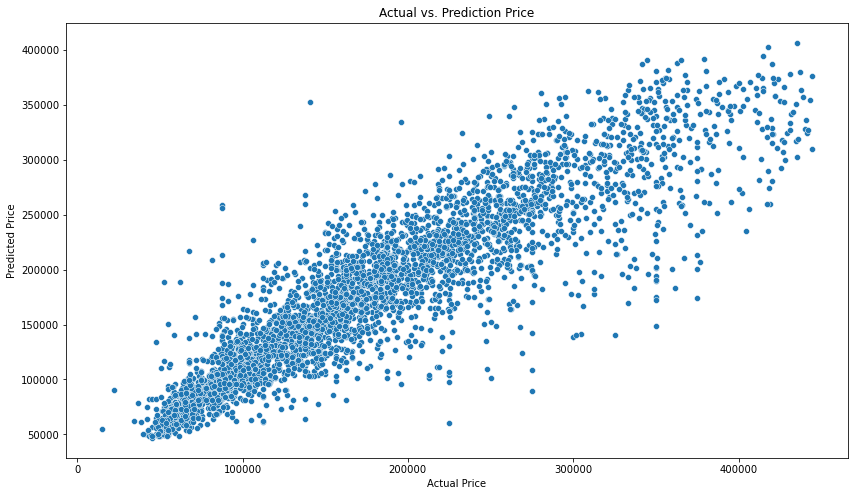

In [61]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

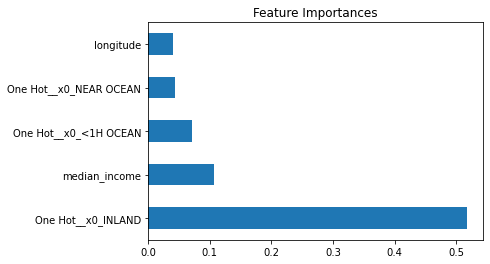

In [62]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## Conclusion

Berdasarkan pemodelan yang sudah dilakukan, fitur 'median_income' dan 'ocean_proximity' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model sebelum dilakukan hyperparameter tuning, yaitu sebesar 40641, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga perumahan di California pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 444950), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar USD 40641 dari harga yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi.

## Recommendation

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Tidak adanya data yang dicapped. Data yang dicapped akan membuat model tidak bisa memprediksi harga yang melebihi limitasi tersebut.
2. 

## Save Model

In [63]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_CaliforniaHousingPrice_XGB.sav', 'wb'))

In [64]:
# Load model
filename = 'Model_CaliforniaHousingPrice_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

**Model sebelum dilakukan hyperparameter tuning**

In [65]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

40649.74403350248